# EXAM: EPA1333 - Computer Engineering for Scientific Computing - ANSWERS
## November 9, 2016     13:30 -16:30

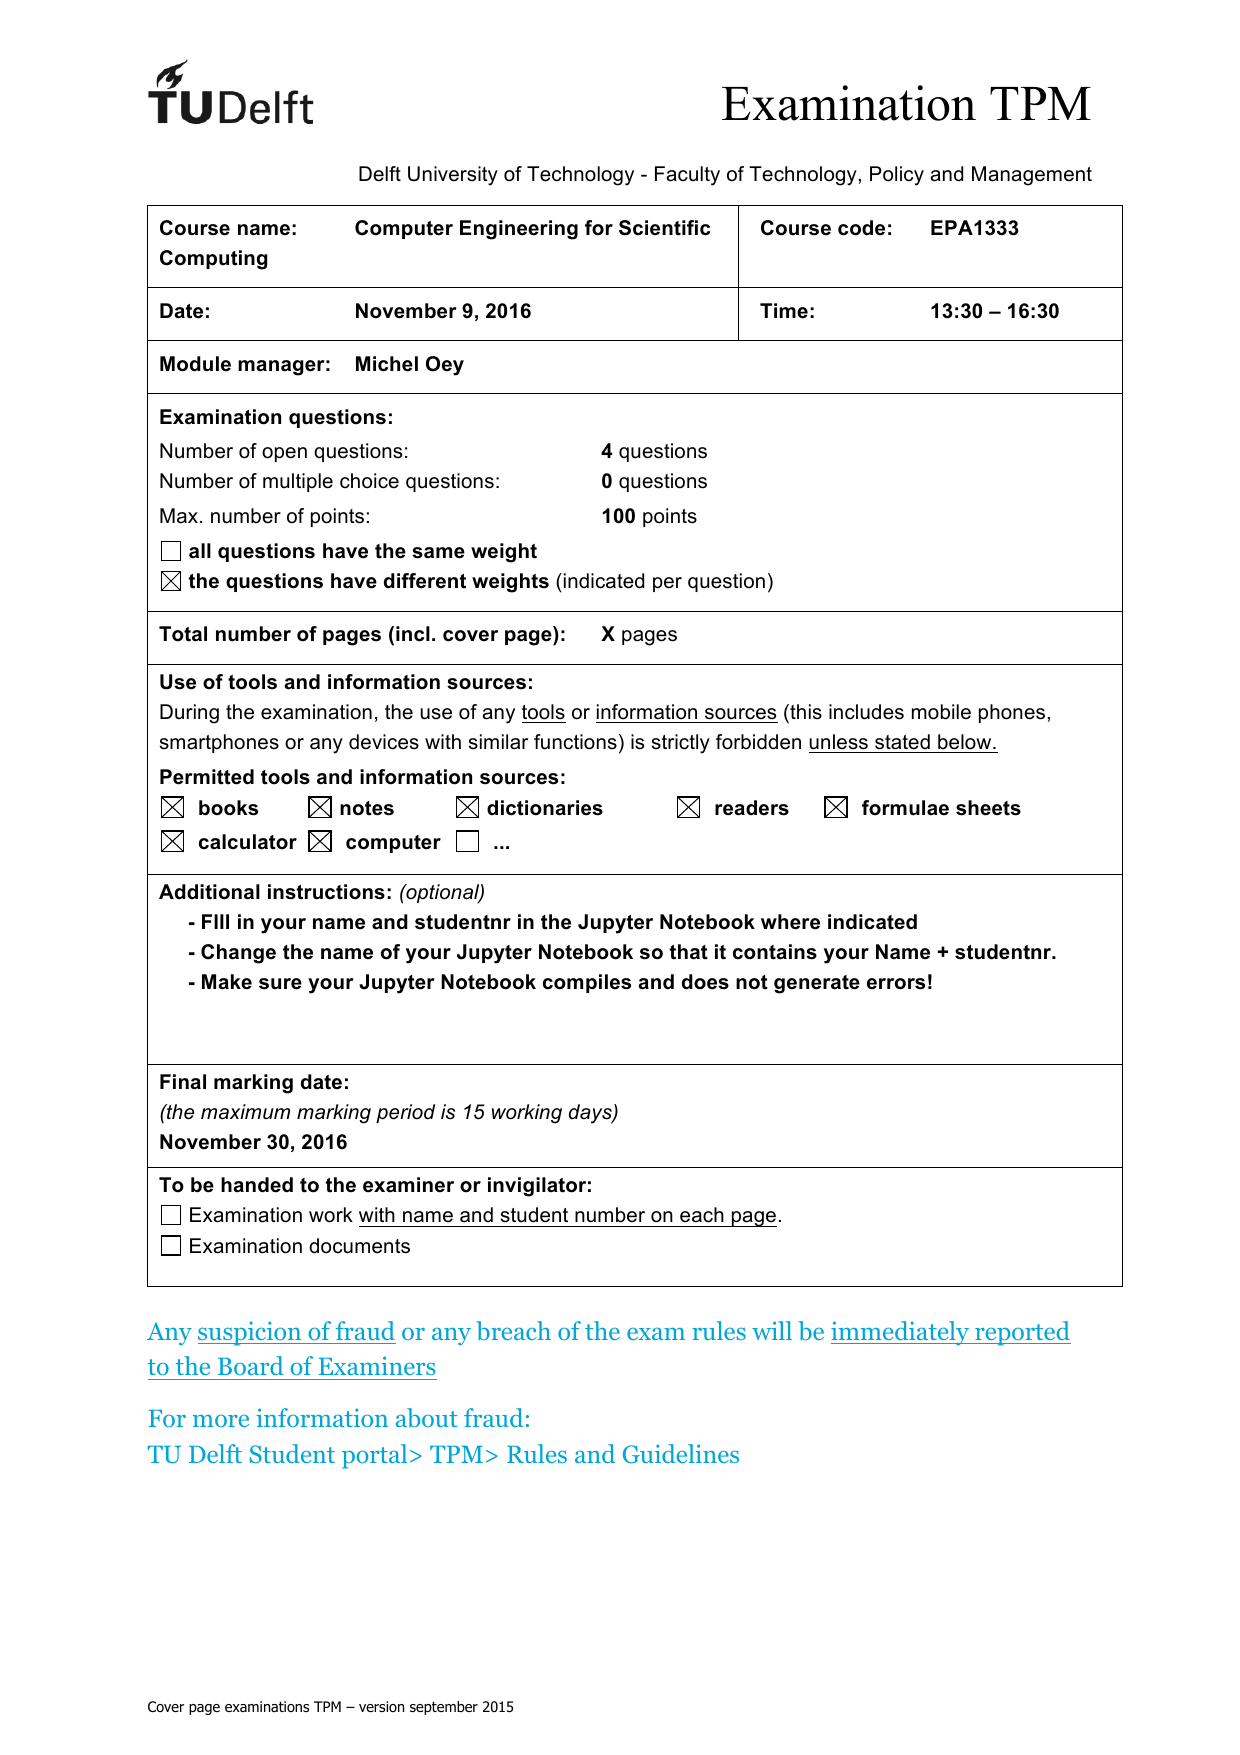

In [1]:
from IPython.core.display import Image
Image('CoverExam.png')

<div class="alert alert-success">
<h2>Name and student nr</h2>
<br>
<br>

<b>Name:</b>  your name here

<br>
<br>

<b>Stud.nr.:</b> your student number here

</div>

# The Exam starts here

### Instructions / Explanations
  * **Do not forget to fill in your name in this exam! **
  * **Rename this Notebook to a filename containing your Name and StudentNr!**
  * A number of data files are provided for some of the questions. You can find them in the same folder as this Notebook.
  * For your convenience, the book Think Python, the Pandas documentation, and the CheatSheets on Python, Pandas and Matplotlib have also been included in this folder.
  * Write your code in the cells beneath the questions. If you need more cells, feel free to create more cells, but keep them grouped together with your question.
  * When necessary provide comments to explain your code. When grading this may help me understand your code.
  * Remember, if you get stuck on one question, continue with another one and come back to it later!
  * Grading will be based on:
      * Correctness (did it solve the problem)
      * Structure (was the chosen solution appropriate for the problem)
      * Readability / coding style
      
  * Your exam grade is: 1 + ((points / 10) * 9)
  * Your total grade for the course is 70% Exam, 30% Practical Assignment.
  * Good luck!

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Question 1: Caesar Cipher (25 points)

The file ```Q1-words.txt``` is provided. This file contains a list of English words, one word per line.

A Caesar Cipher is a simple algorithm to encrypt pieces of text by shifting letters. Shifting a letter simply means moving forward in the alphabet, wrapping around to the beginning when necessary. For example, if you shift the word *HAL* by 1 position, you get *IBM*. How many positions to shift is called the **key** of the Caesar cipher and you must share this key with the recipient of your encrypted message so he/she can decrypt it again.

However, given an encrypted message and an English dictionary, we can deduce the key. We can simply try to decrypt the message with all possible keys and see if *all* the words in the decrypted message are valid words by checking the dictionary. If so, we probably found the key (and the original plain text message).

**Question 1)** **Write a program that prompts the user for an encrypted string and prints out the decrypted string and the key that has been used.**

*Hint*: You may assume that the decrypted and encrypted messages will only contain letters and spaces (no numbers, punctuation, etc.)

*Hint*: ```ord()``` and ```chr()``` are two functions that can turn a letter into its numeric code and vice versa.

You can test your program with these sentences:
    
    encrypted: Cebtenzzvat va Clguba vf sha
    decrypted: Programming in Python is fun  
    key: 13
  
  
    encrypted: Ymnx jcfr nx sty xt inkknhzqy
    decrypted: This exam is not so difficult
    key: 5


In [3]:
# Question 1: your code here

In [4]:
def rotate_word( w, n ):
    """Rotate a word by shifting word w by n positions. 
    We can ignore spaces and other characters."""
    
    # Create a list of the shifted letters. Use modulo to wrap letters.
    new_word = []
    for l in w:
        if (l.isupper()):
            new_letter = chr(((ord(l) - ord('A') + n) % 26) + ord('A'))
        else:
            new_letter = chr(((ord(l) - ord('a') + n) % 26) + ord('a'))
        new_word.append( new_letter )
    
    # Turn the list of letters into a string again.
    return "".join(new_word)

# Testing it
rotate_word("IBM", 25)

'HAL'

In [5]:
# Read the dictionary and create a set of those words.
lines = open('Q1-words.txt').readlines()

# Create a set (faster lookups). Only use lower-case letters.
words = { w.strip().lower() for w in lines }

# Test how many words are in the set.
len(words)

113809

In [6]:
def check_rotation( s, n ):
    """Check if the rotation of the words with key n in the string will yield words in the dictionary.
    Returns a tuple ( boolean, string)
       - boolean - true/false whether all words are in the dictionary
       - string - the rotated string."""
    
    # Create a list of rotated words that were in the string
    rot_l = [ rotate_word(w, n) for w in s.split()]
     
#    print(" ".join(rot_l), n)   # Debug, print the rotated string

    # Check if each word in the rotated string is in the dictionary
    for w in rot_l:
        # When checking words, only check the lower-case version.
        if not (w.lower() in words):
            # We found a word not in the dictionary, so return false
            return False, rot_l
        
    # If we end here, then all words were in the dictionary, return true.
    return True, rot_l

In [7]:
#s = "Cebtenzzvat va Clguba vf sha"
#s = "Ymnx jcfr nx sty xt inkknhzqy"

s = input("Give encrypted string:")

# Try all possible keys (26 max)
for k in range(26):
    success, l = check_rotation( s, k)
    
    if ( success ):
        print("Encrypted:", s)
        print("Decrypted:", " ".join(l) )
        print("Key:", (26 - k))

Give encrypted string:Ymnx jcfr nx sty xt inkknhzqy
Encrypted: Ymnx jcfr nx sty xt inkknhzqy
Decrypted: This exam is not so difficult
Key: 5


## Question 2: The 8-queens problem (25 points)

A chess-board is an 8x8 grid of squares. Each square can be identified via its column and row. A queen is a chess-piece that can be placed on the board on one of the 64 squares. Each square can only hold 1 chess-piece at a time. A queen can move (see) any number of squares in a straight line, horizontally, vertically, or diagonally (see Figure). The question is whether you can place 8 queens on a board at the same time, where no 2 queens can "see" each other. 

**Question 2a)** **Write a program that finds and prints one possible configuration of 8 queens such that no 2 queens see each other.**

**Question 2b)** **Adapt your program such that it reports the total number of possible configurations for 8 queens on a board so that no 2 queens see each other. You do not have to check for congruent solutions (you do not have to check if 2 configurations are mirrors or rotations of one another, simply count them both).**

<img src='Chessboard.png'>


In [8]:
# Question 1a: your code here

In [9]:
# Question 1b: your code here

In [10]:
# 2a) The 8-queens problem

# Locations on a chess-board are denoted by (column, row), where row and column are 1..8
# A solution is a list of 8 locations holding the locations of the 8 queens.
#
# Note: any solution will contain one queen in each column. So we try to place a queen
# in each columne one-by-one, starting at column 1.
#
# We simply try out "all" possible rows for each column.



def place_queen( col, queens ):
    '''Recursive function. Try to place a queen somewhere in column col.
    queens is a list that contains the locations of the other queens already on the board.
    Returns True if it has found a solution to place all the eight queens. False, otherwise.
    '''
    
    # If we try to place a new queen beyond the final column, we are done
    if col > 8:
        # Print the found solution
        print('Found it', queens)
        return True
    
    # Try to place a queen in one of the rows 1..8
    for row in range(1, 9):
        # The location of the new queen to place
        new_queen = (col, row)
        
        # Test if this location will yield a safe board with the queens already on the board.
        if safe( new_queen, queens ):
            # Yes, found a new safe location for the queen. 
            # Now try to place the next and following queens on the board in the next column.
            if ( place_queen( col + 1, queens + [ new_queen ])) :
                # Yes, we succeeded
                return True
    
    # If we get here.. it means we could not find a safe place to place the queen in this column
    return False

        
def safe( new_queen, queens ):
    """Returns if the board with new_queen and the list of queens on the board 
    forms a safe board where no queen can see another queen.
    Assumption: the list of existing queens forms a board that is already safe.
      - new_queen - (column, row) position of the new queen
      - queens - list of positions of queens that are already on the board."""
    
    # If there are no queens on the board yet, the new_queen can always be placed safely.
    if len(queens) == 0:
        return True
    
    # Get the column and row from this queen
    (c, r) = new_queen
    
    # Check each of the existing queens on the board, to see if they can see the new queen.
    # We do not have to check if the queens in the list of queens can see each other, that is the assumption
    for ( x, y ) in queens:
        # Do the queens share the same column or row with the new_queen?
        if (x == c) or (y == r): 
            return False
        
        # Do the queens share the same diagonal?
        if abs( c - x ) == abs( r - y ):
            return False
    
    # The new board is safe!
    return True
    
    

In [11]:
# Now call our recursive function, trying to place the queen in the first column (1) and 
# we start with an empty board (empty list of queens)
place_queen(1,[])

Found it [(1, 1), (2, 5), (3, 8), (4, 6), (5, 3), (6, 7), (7, 2), (8, 4)]


True

In [12]:
# 2b)

def find_solutions( col, queens, solutions ):
    '''Recursive function. Try to place queen in column col.
    queens is a list that contains the locations of the other queens already on the board.
    If a solution is found, store it in the list solutions.
    Function is very similar to place_queen() function, only this time the answer is saved.
    '''
    
    # If we try to place the queen beyond the final column, we are done. Store the found solution.
    if col > 8:
        solutions.append(queens)
        return
    
    # Try to place a new queen in one of the rows 1..8
    for row in range(1, 9):
        # The location of the new queen to place
        new_queen = (col, row)
        
        # Test if this location will yield a safe board with the queens already on the board.
        if safe( new_queen, queens ):
            # Yes, found a new safe location for the queen. 
            # Now try to place the next and following queens on the board in the next column.
            find_solutions( col + 1, queens + [ new_queen ], solutions)
    
    # If we get here.. it means we could not find a safe place to place the queen in this column
    # just continue

In [13]:
# Now call our recursive function, providing an empty list of solutions.
solutions= []
find_solutions( 1, [], solutions )
len(solutions)

92

## Question 3: UFO sightings (30 points)

The file ```Q3-ufo.csv``` is provided and contains a database of UFO sightings in the US over the period of around 70 years. A sighting describes the date, the city, the state, the color and the shape of the reported UFO, if known.

**Question 3a)** **How many different (real) colors were seen?**

**Question 3b)** **How many NaN values are stored for the Shape?**

**Question 3c)** **Replace all the NaN values in the Shape with the value 'VARIOUS'. Store the result.**

**Question 3d)** **Show an overview of how many sightings there were per State and Shape combination. Sort the result alphabetically on the state, shape combination. Note: there are only 50 states, you may need to clean up the State data first.**

**Question 3e)** **Show how many sightings there were in May 1965.**

**Question 3f)** **Calculate an overview of how many sightings there were per year. Plot the result in a graph.**


In [13]:
# Question 3a: your code here

In [14]:
# Question 3b: your code here

In [15]:
# Question 3c: your code here

In [16]:
# Question 3d: your code here

In [17]:
# Question 3e: your code here

In [18]:
# Question 3f: your code here

In [14]:
# 3a

# Read in the UFO data. Make sure we read the date as a real date and make it the index
# Reading the date as a real date will make life easier in later questions, but it is
# not necessary.
ufo = pd.read_csv('Q3-ufo.csv', parse_dates=[4], index_col=4)
ufo.head()

,City,Colors Reported,Shape Reported,State
Time,,,,
1930-06-01 22:00:00,Ithaca,NaN,TRIANGLE,NY
1930-06-30 20:00:00,Willingboro,NaN,OTHER,NJ
1931-02-15 14:00:00,Holyoke,NaN,OVAL,CO
1931-06-01 13:00:00,Abilene,NaN,DISK,KS
1933-04-18 19:00:00,New York Worlds Fair,NaN,LIGHT,NY


In [15]:
# Now, check the colors
ufo['Colors Reported'].unique()

array([nan, 'RED', 'GREEN', 'BLUE', 'ORANGE', 'YELLOW', 'ORANGE YELLOW',
       'RED GREEN', 'RED BLUE', 'RED ORANGE', 'RED GREEN BLUE',
       'RED YELLOW GREEN', 'RED YELLOW', 'GREEN BLUE', 'ORANGE GREEN BLUE',
       'ORANGE GREEN', 'YELLOW GREEN', 'RED YELLOW BLUE', 'ORANGE BLUE',
       'RED YELLOW GREEN BLUE', 'YELLOW GREEN BLUE', 'RED ORANGE YELLOW',
       'RED ORANGE YELLOW BLUE', 'YELLOW BLUE', 'RED ORANGE GREEN',
       'RED ORANGE BLUE', 'ORANGE YELLOW GREEN', 'ORANGE YELLOW BLUE'], dtype=object)

In [16]:
# Number of different colors (do not count the 'NaN' value)
ufo['Colors Reported'].unique().shape[0] - 1

27

In [17]:
# Alternative
ufo['Colors Reported'].value_counts().count()

27

In [18]:
# 3b

# Count the NaN values in the 'Shape Reported' column
# Note, use sum() not count()
ufo['Shape Reported'].isnull().sum()

2644

In [19]:
# 3c

# Replace all the NaN values with VARIOUS
ufo['Shape Reported'].replace(np.nan, 'VARIOUS', inplace=True)


# Check
ufo['Shape Reported'].isnull().sum()

0

In [20]:
# 3d

# Check the values of State
print("Nr of states found:", ufo.State.unique().shape[0])

ufo.State.unique()

Nr of states found: 52


array(['NY', 'NJ', 'CO', 'KS', 'ND', 'CA', 'MI', 'AK', 'OR', 'AL', 'SC',
       'IA', 'GA', 'TN', 'NE', 'LA', 'KY', 'WV', 'NM', 'UT', 'RI', 'FL',
       'VA', 'NC', 'TX', 'WA', 'ME', 'IL', 'AZ', 'OH', 'PA', 'MN', 'WI',
       'MD', 'SD', 'NV', 'ID', 'MO', 'OK', 'IN', 'CT', 'MS', 'AR', 'WY',
       'MA', 'MT', 'DE', 'NH', 'VT', 'HI', 'Ca', 'Fl'], dtype=object)

In [21]:
# We see CA and Ca, and FL and Fl
# Make them the same

ufo.State = ufo.State.str.upper()

# Check again
ufo.State.unique()

array(['NY', 'NJ', 'CO', 'KS', 'ND', 'CA', 'MI', 'AK', 'OR', 'AL', 'SC',
       'IA', 'GA', 'TN', 'NE', 'LA', 'KY', 'WV', 'NM', 'UT', 'RI', 'FL',
       'VA', 'NC', 'TX', 'WA', 'ME', 'IL', 'AZ', 'OH', 'PA', 'MN', 'WI',
       'MD', 'SD', 'NV', 'ID', 'MO', 'OK', 'IN', 'CT', 'MS', 'AR', 'WY',
       'MA', 'MT', 'DE', 'NH', 'VT', 'HI'], dtype=object)

In [22]:
# Now, show an overview per state
ufo.groupby(['State', 'Shape Reported']).size().sort_index(ascending=True)

State  Shape Reported
AK     CIGAR              6
       CIRCLE             8
       CONE               1
       CYLINDER           2
       DIAMOND            1
       DISK              12
       FIREBALL           2
       FLASH              4
       FORMATION          3
       LIGHT             24
       OTHER              7
       OVAL              10
       RECTANGLE          3
       SPHERE            10
       TRIANGLE           4
       VARIOUS           19
AL     CIGAR              5
       CIRCLE            16
       CYLINDER           3
       DISK              28
       EGG                4
       FIREBALL           9
       FLASH              3
       FORMATION          3
       LIGHT             25
       OTHER             12
       OVAL              12
       RECTANGLE          6
       SPHERE            17
       TEARDROP           1
                         ..
WV     DISK              21
       EGG                2
       FIREBALL           8
       FLASH              

In [23]:
# Alternative, pivot_table
ufo[['State','Shape Reported']].pivot_table(index='State',columns='Shape Reported', aggfunc=len, fill_value=0 )

Shape Reported,CHEVRON,CIGAR,CIRCLE,CONE,CRESCENT,CROSS,CYLINDER,DELTA,DIAMOND,DISK,...,LIGHT,OTHER,OVAL,PYRAMID,RECTANGLE,ROUND,SPHERE,TEARDROP,TRIANGLE,VARIOUS
State,,,,,,,,,,,,,,,,,,,,,
AK,0,6,8,1,0,0,2,0,1,12,...,24,7,10,0,3,0,10,0,4,19
AL,0,5,16,0,0,0,3,0,0,28,...,25,12,12,0,6,0,17,1,26,23
AR,3,9,17,0,0,1,7,0,0,21,...,40,13,2,0,3,0,10,1,38,23
AZ,17,15,63,5,0,1,14,0,11,34,...,144,71,30,0,7,0,36,3,88,107
CA,40,86,174,6,0,8,28,0,36,287,...,394,207,102,0,41,1,155,17,210,443
CO,5,12,20,0,0,0,8,0,2,32,...,67,39,13,0,9,0,20,5,45,53
CT,5,5,26,0,0,0,6,0,3,33,...,29,13,9,0,6,0,9,2,24,39
DE,0,0,4,0,0,0,0,0,0,7,...,4,5,2,0,1,0,2,1,9,5
FL,16,22,56,3,0,0,14,0,12,88,...,137,71,39,0,8,0,46,7,89,134


In [24]:
# 3e

# Show number of sightings in May 1965
# Since we have real dates as index, this answer is quite simple.
# Alternatives exist.
ufo['1965-05'].shape[0]


10

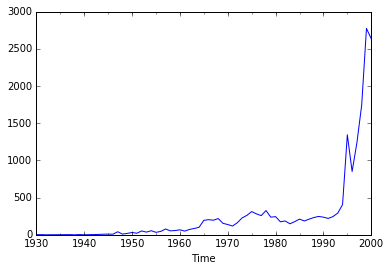

In [25]:
# 3f

# Show number sightings per year

# First add an extra field for counting, we could also use an existing field, 
# but make sure it does not contain NaN values! (City contains NaN values)
ufo['Count'] = 1


# Now we can count / plot
#ufo.Count.resample("AS").count().sum()
ufo.Count.resample("AS").count().plot()


# We can use resample, but that is not necessary. We could also groupby the year only
#ufo.groupby(ufo.index.year).size().plot()

In [26]:
# This yields a different answer, as some Cities are NaN...
# We can see this if we count them (sum). It should be 18241.
ufo.City.resample("AS").count().sum()

18216

In [27]:
# Alternative.. use the Shape Reported column (or State column), which does not contain NaN
ufo['Shape Reported'].resample("AS").count().sum()

18241

## Question 4: Movie-Lens data (20 points)

The files ```Q4-users.dat, Q4-movies.dat, Q4-ratings.dat``` and ```Q4-README.txt``` are provided and contain a database of users, movies and ratings of those movies by those users. The ```Q4-README.txt``` file contains more information on each of those files.

The ```Q4-movies.dat``` file contains titles of movies (including the year of prodution) and a list of genres that movie belongs to.

**Question 4a)** **Show an overview of the average rating per genre. Sort this overview on highest rating first.**

**Question 4b)** **Plot a bar-chart showing how many movies were produced per year.**

*Hint:* To change the size of a graph you *can* use: ```dataframe.plot(..., figsize=(20,5), ...)```. Change the arguments as desired to get the result wanted.


In [28]:
# Question 4a: your code here

In [29]:
# Question 4b: your code here

In [30]:
# 4a)
# Read in the movies.dat file. Name the columns and set the index to the movie_id.
# Setting the index is not necessary.
movies=pd.read_csv('Q4-movies.dat', sep="::", engine="python", 
                  names=["movie_id", "title", "genres"], index_col=0)
movies.head()

,title,genres
movie_id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy


In [31]:
# Create separate columns (True, False) for each genre category.
# Each movie (row) will have True or False in the appropriate genre column

# First get a set of movie genres. (Set is faster than lists and only contains unique elements)
gset = set()
for genres in movies.genres:
    # Each genres field, must be slit up into its separate genres by splitting on the '|'
    # Then put them into the set.
    gset.update( genres.split('|') )
    
# Sort the set, so we get them in order
gset = sorted(gset)

# Now, for each genre, create a column in the movies dataframe and put True or False
# depending on whether that genre is inside the "genres" field. (Using 'str.contains')
for g in gset:    
    movies[g] = movies.genres.str.contains( g )

In [32]:
# Let's check the result
movies.head(2)

,title,genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Animation|Children's|Comedy,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Jumanji (1995),Adventure|Children's|Fantasy,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [34]:
# Read the ratings data file. Name the columns.
ratings = pd.read_csv( 'Q4-ratings.dat', sep="::", engine="python",
                     names=["user_id", "movie_id", "rating", "timestamp"])
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [35]:
# Merge the ratings and movies dataframes. The common datafield is "movie_id", which
# is the index in our movies dataframe, so use "left_index=True"

movie_ratings = pd.merge( movies, ratings, left_index=True, right_on='movie_id')

# Let's check the result
movie_ratings.head()

,title,genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,movie_id,rating,timestamp
40,Toy Story (1995),Animation|Children's|Comedy,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,1,1,5,978824268
469,Toy Story (1995),Animation|Children's|Comedy,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,6,1,4,978237008
581,Toy Story (1995),Animation|Children's|Comedy,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,8,1,4,978233496
711,Toy Story (1995),Animation|Children's|Comedy,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,9,1,5,978225952
837,Toy Story (1995),Animation|Children's|Comedy,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,10,1,5,978226474


In [36]:
# Now create two lists:
# glist - a list of genres
# rlist - a list of average ratings for each of the genres

glist=[]
rlist=[]

# For each genre, determine the mean-rating of the corresponding movies.
for g in gset:
    r = movie_ratings[movie_ratings[g] == True].rating.mean()
    # Alternative, but slower:
    # r = movie_ratings[movie_ratings['genres'].str.contains(g)].rating.mean()
    
    # Add the genre and found rating to the lists.
    glist += [g]
    rlist += [r]

#print(len (glist), len(rlist))  # DEBUG

# Create a series out of these lists.
s = pd.Series( rlist, index=glist )

# Sort the series and print the result.
s.sort_values(ascending=False)
    

Film-Noir      4.075188
Documentary    3.933123
War            3.893327
Drama          3.766332
Crime          3.708679
Animation      3.684868
Mystery        3.668102
Musical        3.665519
Western        3.637770
Romance        3.607465
Thriller       3.570466
Comedy         3.522099
Action         3.491185
Adventure      3.477257
Sci-Fi         3.466521
Fantasy        3.447371
Children's     3.422035
Horror         3.215013
dtype: float64

In [37]:
# Quick sanity check if the value is the same for 'Horror' movies
movie_ratings[movie_ratings['Horror'] ].rating.mean()

3.2150132223182259

In [38]:
# Another sanity check for Western movies, this time use groupby.
movie_ratings.groupby('Western').rating.mean()

Western
False    3.580378
True     3.637770
Name: rating, dtype: float64

In [39]:
# 4b)

# Create a separate column Year which consists of the year value in the title of the movie. 
movies['year'] = movies.title.str.slice(start=-5,stop=-1)

# Check the result
movies.head(2)

,title,genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Animation|Children's|Comedy,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1995
2,Jumanji (1995),Adventure|Children's|Fantasy,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1995


In [40]:
# Check if the column is there
movies.columns

Index(['title', 'genres', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'year'],
      dtype='object')

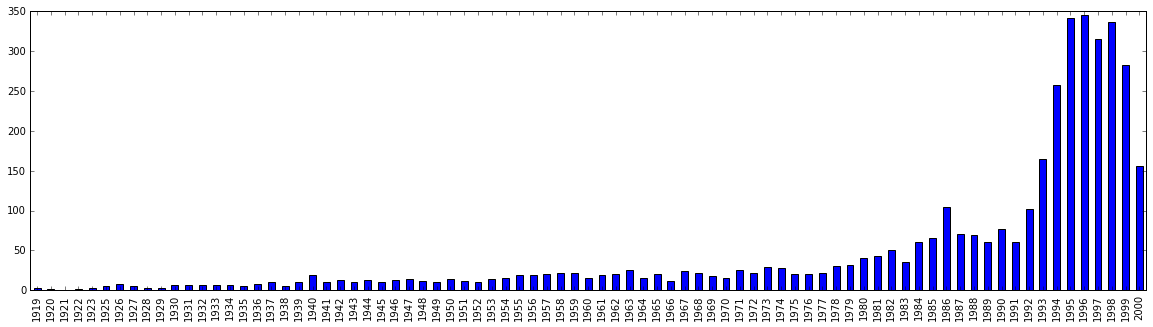

In [41]:
# Now plot the bar-chart

movies.year.value_counts().sort_index().plot(kind="bar", figsize=(20,5))
#movies.year.value_counts().sort_index().plot(kind="barh", figsize=(5, 20))


# End of the Exam

  * **Rename this Jupyter Notebook, such that it contains your name and student number**
  * **Have you filled in your name and student number in this Notebook?**